<a href="https://www.kaggle.com/code/mitzbek/nsurance-predict-with-ml-regressor-models?scriptVersionId=142056301" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


**DESCRİPTİON**


This notebook I will apply ML regressor models to the data..

In [2]:
# Loading data
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#I will try to understand the data, 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
# Checking missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.shape

(1338, 7)

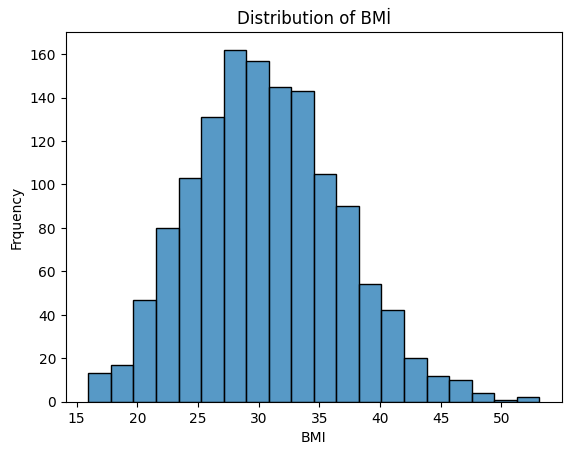

In [8]:
# visualization to bmi values

sns.histplot(data=df, x='bmi', bins=20)  
plt.xlabel('BMI')
plt.ylabel('Frquency')
plt.title('Distribution of BMİ')
plt.show()

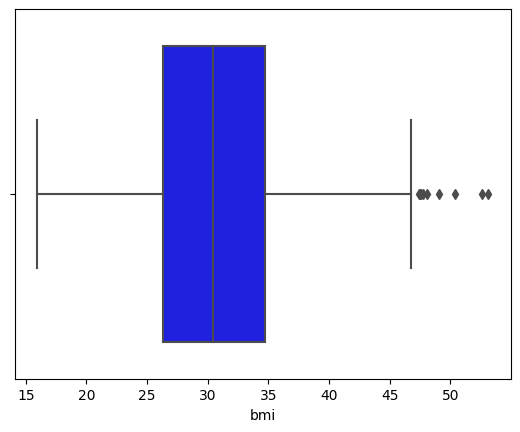

In [9]:
sns.boxplot(x='bmi',data=df,color='blue')
plt.show()

In [10]:
 # Bmi got outliers values.
 #suppress the outliers

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['bmi']<lower_limit)|(df['bmi']>upper_limit)]
print('IQR',IQR,'**Upper_Limit',upper_limit,'**Lower Limit',lower_limit)

IQR 8.3975 **Upper_Limit 47.290000000000006 **Lower Limit 13.7


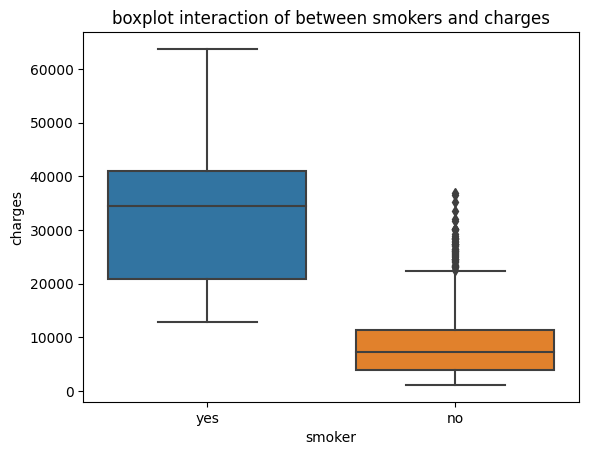

In [11]:
# The charges by smokers and non-smokers

sns.boxplot(x="smoker", y="charges", data=df)
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('boxplot interaction of between smokers and charges')
plt.show()

In [12]:
df.groupby("smoker")["charges"].mean().head()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

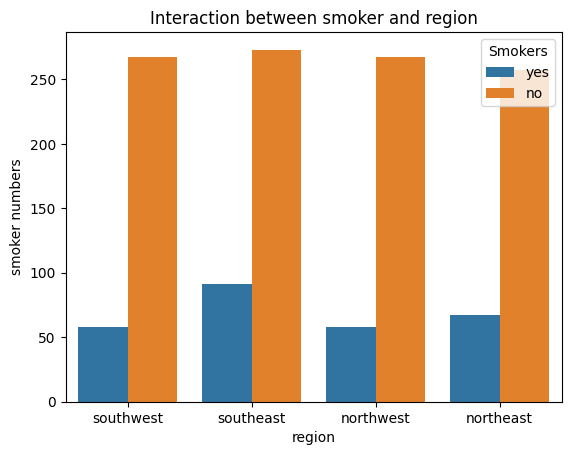

In [13]:
# The smokers by region.
# The most smokers area.

sns.countplot(data=df,x="region", hue="smoker")
plt.xlabel('region')
plt.ylabel('smoker numbers')
plt.title('Interaction between smoker and region')
plt.legend(title="Smokers")
plt.show()

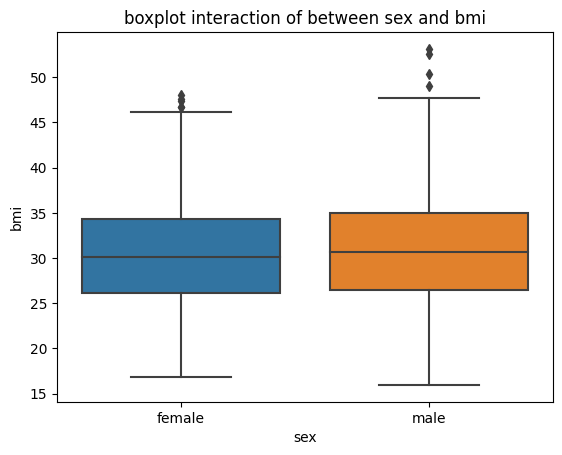

In [14]:
# Sex by body mass index.

sns.boxplot(x = 'sex',y = 'bmi',data = df)
plt.xlabel('sex')
plt.ylabel('bmi')
plt.title('boxplot interaction of between sex and bmi')
plt.show()

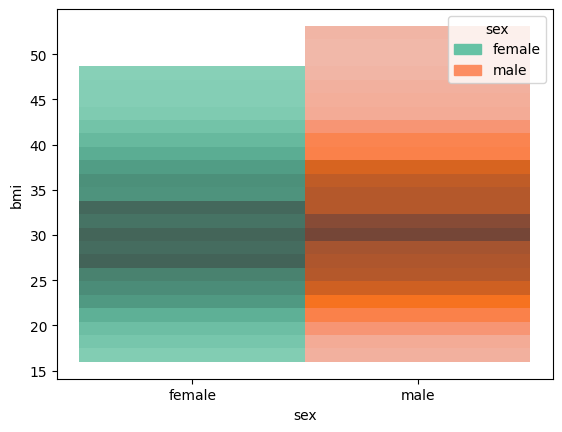

In [15]:
sns.histplot(data=df,x='sex', y='bmi',hue='sex', palette ='Set2')
plt.show()

In [16]:
df.groupby("sex")["bmi"].mean().head()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

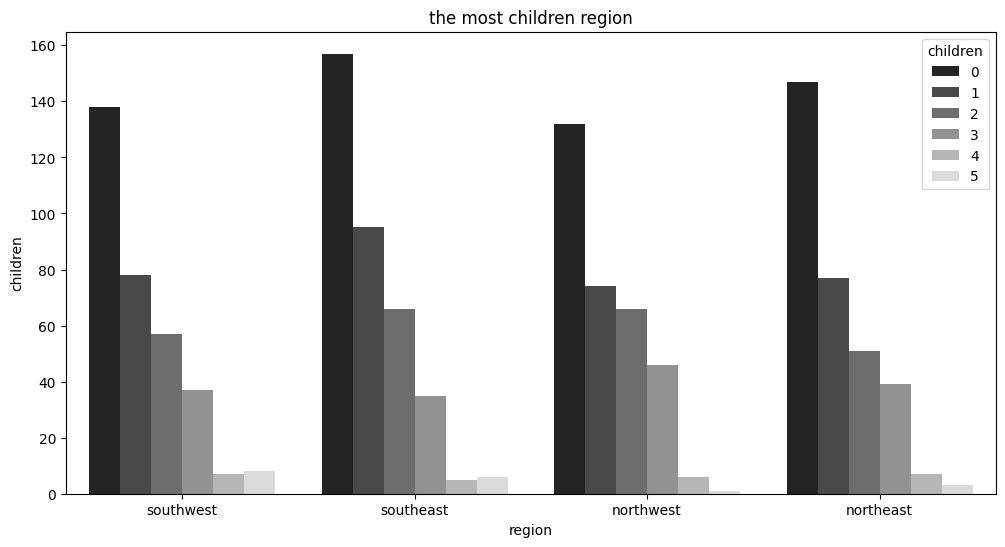

In [17]:
# Number of children by region.
# The most children area

f, axis = plt.subplots(figsize = (12,6))
sns.countplot(x='region',hue='children', palette='gist_gray',data=df)
plt.xlabel('region')
plt.ylabel('children')
plt.title('the most children region')
plt.show()

In [18]:
df.groupby("region")["children"].sum().head().sort_values(ascending=False)

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64

In [19]:
# Body mass index by age.

fig = px.scatter(df, x = "age", y="bmi", color="sex",
                 size='bmi', hover_data=['age'])
fig.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



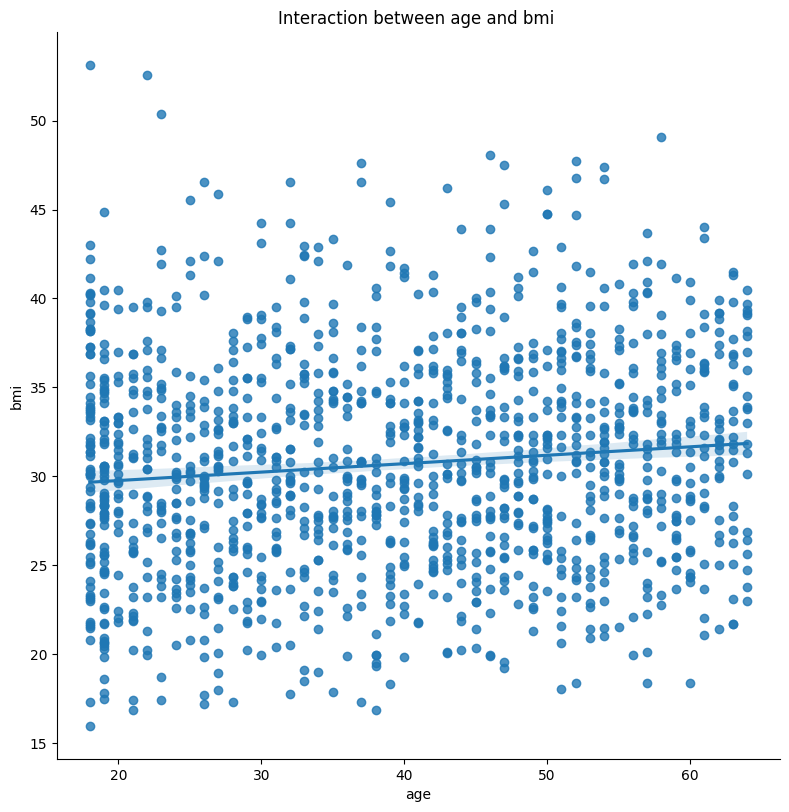

In [20]:
sns.lmplot(x="age", y="bmi", height=8, aspect=1,data = df)
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('Interaction between age and bmi ')
plt.show()

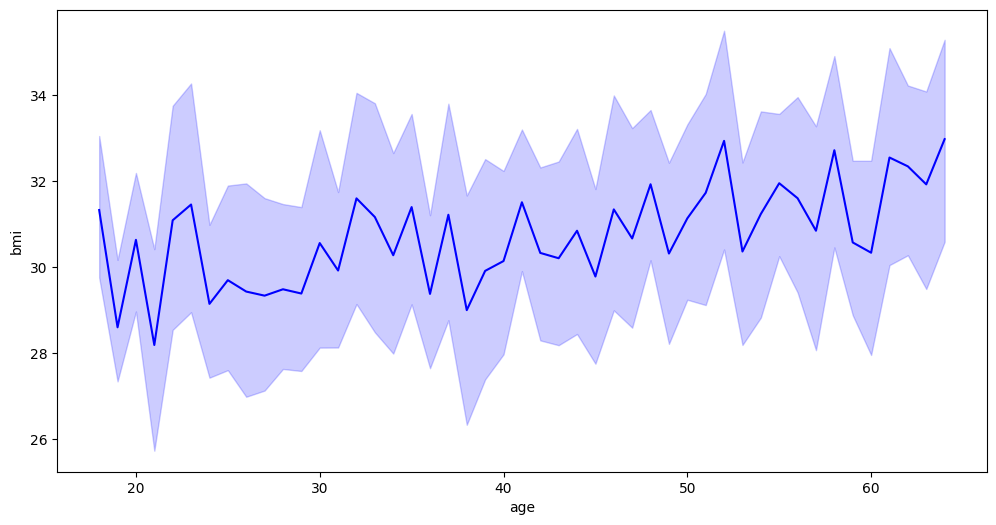

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x='age', y='bmi',color='blue',data=df)
plt.show()

In [22]:
#  Converting tthe Categoric values to numeric.
# get_dummies

data = pd.get_dummies(df)

In [23]:
# Outliers got charges values.
#  I will apply smae same supress to charges values..

Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = data[(data['charges']<lower_limit)|(data['charges']>upper_limit)]
print('IQR',IQR,'**Upper_Limit',upper_limit,'**Lower Limit',lower_limit)

IQR 11899.625365 **Upper_Limit 34489.350562499996 **Lower Limit -13109.1508975


In [24]:
X = data.drop(['charges'],axis = 1)
y = data['charges']

In [25]:
# Splitting the data.

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, 
                                                 random_state = 50)
print(X.shape,y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(1338, 11) (1338,)
(1070, 11) (1070,)
(268, 11) (268,)


In [26]:
# Feature scaling

from sklearn.preprocessing import StandardScaler,MinMaxScaler

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)



minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled= minmax.transform(X_test)



In [27]:
# Best parameters and scores with GridSearchCv


scores=[]
best_estimators = {}
model_params = {  
    
    
    'linearreg': {
        'model': LinearRegression(),
        'params': {
            
            'fit_intercept': [True, False],
            
            
             }
        },
    'GradientBoostingreg':{
        'model':GradientBoostingRegressor(),
        'params':{
            'n_estimators' : [100,200,300,500],
            'learning_rate' : [0.05,0.25,0.50,1],
            'max_depth'    : [4,6,8,10],
            'min_samples_split':[2,4,5,6]
            
        }
    },
    'RandomForestreg':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators'     : [100,200,500,800,1000],
            'min_samples_split' : [2,4,8],
            'max_depth': [None, 10, 20],
            
            }
            
        }
}

In [28]:
for mn, mp in model_params.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    print(mp['model'], mp['params'])
    
    reg.fit(X_train_scaled, y_train) 
    
    scores.append({
        'model': mn,
        'best_score': reg.best_score_,
        'best_params': str(reg.best_params_)
    })
    best_estimators[mn] = reg.best_estimator_

LinearRegression() {'fit_intercept': [True, False]}
GradientBoostingRegressor() {'n_estimators': [100, 200, 300, 500], 'learning_rate': [0.05, 0.25, 0.5, 1], 'max_depth': [4, 6, 8, 10], 'min_samples_split': [2, 4, 5, 6]}
RandomForestRegressor() {'n_estimators': [100, 200, 500, 800, 1000], 'min_samples_split': [2, 4, 8], 'max_depth': [None, 10, 20]}


In [29]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df = df.sort_values(by='best_score',ascending=False)
df

,model,best_score,best_params
1,GradientBoostingreg,0.849293,"{'learning_rate': 0.05, 'max_depth': 4, 'min_s..."
2,RandomForestreg,0.842832,"{'max_depth': 10, 'min_samples_split': 8, 'n_e..."
0,linearreg,0.736292,{'fit_intercept': True}


In [30]:
cross_val_score(best_estimators['RandomForestreg'],X_test_scaled,y_test,cv=5).mean()

0.8412188012236446

In [31]:
cross_val_score(best_estimators['GradientBoostingreg'],X_test_scaled,y_test,cv=5).mean()

0.8349711628369695

In [32]:
cross_val_score(best_estimators['linearreg'],X_test_scaled,y_test,cv=5).mean()

0.7579834497125063

In [33]:
# Building model best params..

df.best_params[1]

"{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}"

In [34]:
grd_boost_reg =GradientBoostingRegressor(n_estimators=100,min_samples_split=5,
                                            max_depth= 4,learning_rate=0.05)
grd_boost_reg.fit(X_train_scaled,y_train)
print(grd_boost_reg.score(X_train_scaled,y_train))
print(grd_boost_reg.score(X_test_scaled,y_test))


0.8994205977940474
0.8777150482671444


In [35]:
y_pred = grd_boost_reg.predict(X_test_scaled[:3])
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Charges"])
y_pred_df



,Predicted Charges
0,6770.661389
1,6314.978432
2,13211.378272


In [36]:
y_test_real = pd.Series(y_test)
y_test_real.reset_index(drop=True, inplace=True)
y_test_real_df = pd.DataFrame(y_test_real[:3])
new_column = {'charges': 'Actual Charges'}
y_test_real_df.rename(columns= new_column,inplace=True)
y_test_real_df

,Actual Charges
0,5976.8311
1,5846.9176
2,13831.1152


In [37]:
df.best_params[2]

"{'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 1000}"

In [38]:
Rnd_forest_reg =RandomForestRegressor(n_estimators=100,max_depth=10,
                                      min_samples_split=8)
Rnd_forest_reg.fit(X_train_scaled,y_train)
print(Rnd_forest_reg.score(X_train_scaled,y_train))
print(Rnd_forest_reg.score(X_test_scaled,y_test))

0.9337540689311251
0.8699240983303963


In [39]:
y_pred = Rnd_forest_reg.predict(X_test_scaled[:3])
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Charges"])
y_pred_df

,Predicted Charges
0,6280.603712
1,7871.554949
2,14338.103958


In [40]:
y_test_real = pd.Series(y_test)
y_test_real.reset_index(drop=True, inplace=True)
y_test_real_df = pd.DataFrame(y_test_real[:3])
new_column = {'charges': 'Actual Charges'}
y_test_real_df.rename(columns= new_column,inplace=True)
y_test_real_df

,Actual Charges
0,5976.8311
1,5846.9176
2,13831.1152


**CONCLUSİON**


This notebook I tried to apply ML regressor models to data,I will be waiting for your suggestion.